In [56]:
# 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [58]:
df['total_spent'] = df['TV'] + df['radio'] + df['newspaper'] 
df.head()

,TV,radio,newspaper,sales,total_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


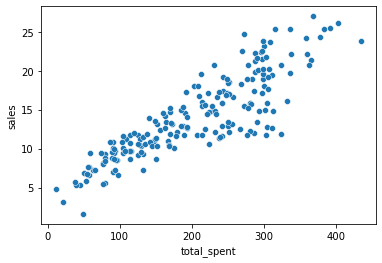

In [59]:
sns.scatterplot(data = df, x = 'total_spent', y = 'sales');

In [60]:
X = df['total_spent']
y = df['sales']
b1, b0 = np.polyfit(X, y, deg = 1)
spent = np.linspace(0, 500, 100)
predicted_sales = (b1 * spent) + b0

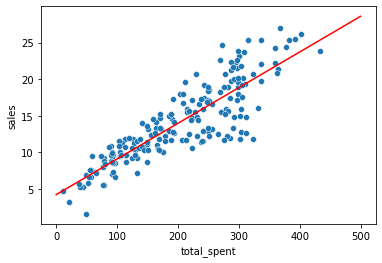

In [61]:
sns.scatterplot(data = df, x = 'total_spent', y = 'sales');
plt.plot(spent, predicted_sales, color = 'red');

In [83]:
# 2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

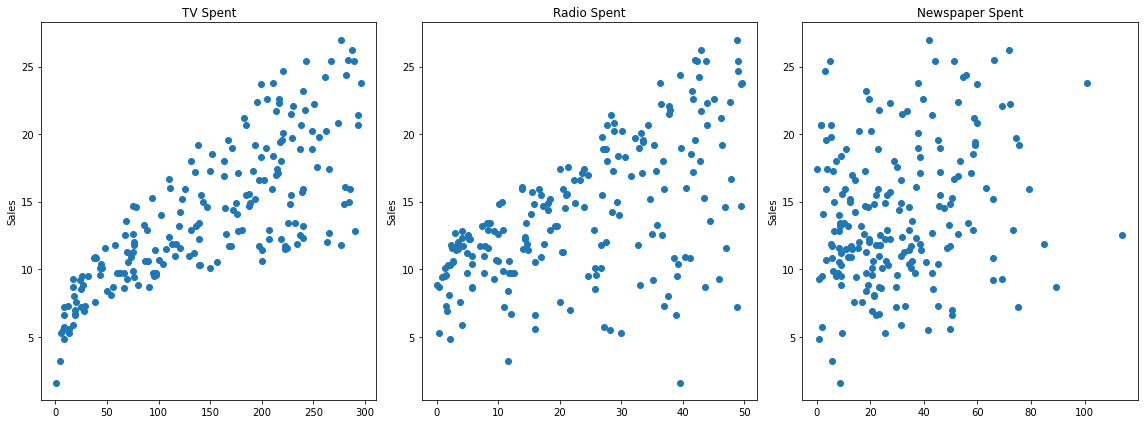

In [62]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spent")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_title("Radio Spent")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_title("Newspaper Spent");
axes[2].set_ylabel("Sales")

plt.tight_layout();

In [68]:
X2 = df.drop(['sales', 'total_spent'], axis = 1)
y2 = df['sales']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

In [79]:
model = LinearRegression().fit(X_train, y_train)

In [84]:
y_pred = model.predict(X_test)

In [85]:
mean_absolute_error(y_test, y_pred)

1.5116692224549084

In [87]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.9485372043446383

In [88]:
residuals = y_test - y_pred

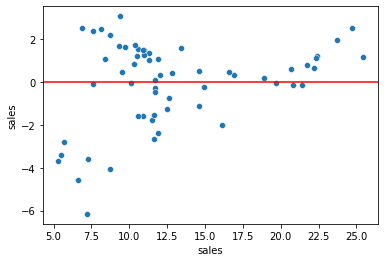

In [93]:
sns.scatterplot(x = y_test, y = residuals);
plt.axhline(color = 'red');

In [94]:
import scipy as sp

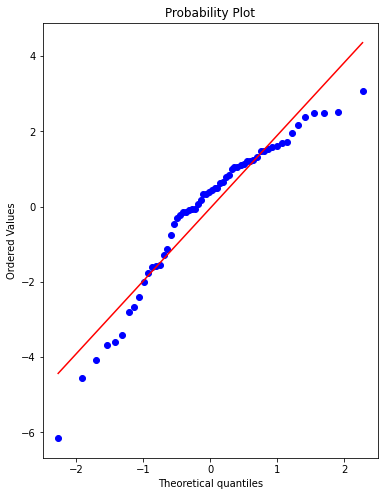

In [96]:
fig, ax = plt.subplots(figsize = (6, 8));
sp.stats.probplot(residuals, plot = ax);

In [97]:
final_model = LinearRegression().fit(X2, y2)

In [98]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [100]:
y_hat = final_model.predict(X2)

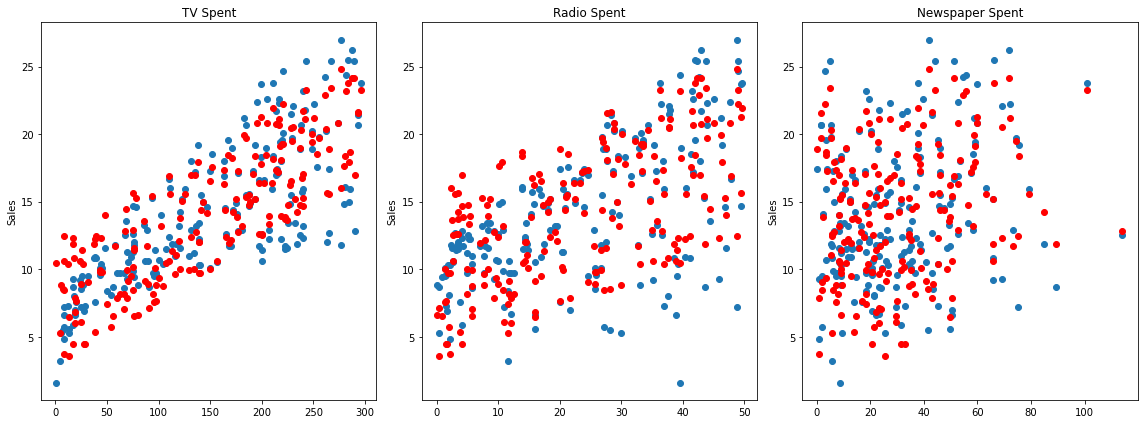

In [102]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color = 'red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spent")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color = 'red')
axes[1].set_title("Radio Spent")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color = 'red')
axes[2].set_title("Newspaper Spent");
axes[2].set_ylabel("Sales")

plt.tight_layout();

In [103]:
from joblib import dump, load

In [104]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [105]:
load_sales_model = load('final_sales_model.joblib')

In [106]:
load_sales_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [107]:
example = [[150, 67, 21]]

In [108]:
load_sales_model.predict(example)

array([22.41330997])